In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt 

rest = pd.read_csv("../data_files/data_from_android_api/rest/rest_25_mins.csv")

forward_android1 = pd.read_csv("../data_files/data_from_android_api/forward/forward_5mins_1.csv")
forward_android2 = pd.read_csv("../data_files/data_from_android_api/forward/forward_5mins_2.csv")
forward_android3 = pd.read_csv("../data_files/data_from_android_api/forward/forward_5mins_3.csv")
forward_android4 = pd.read_csv("../data_files/data_from_android_api/forward/forward_5mins_4.csv")
forward_android5 = pd.read_csv("../data_files/data_from_android_api/forward/forward_5mins_5.csv")

back1 = pd.read_csv('../data_files/data_from_android_api/back/back_5mins_1.csv')
back2 = pd.read_csv('../data_files/data_from_android_api/back/back_5mins_2.csv')
back3 = pd.read_csv('../data_files/data_from_android_api/back/back_5mins_3.csv')
back4 = pd.read_csv('../data_files/data_from_android_api/back/back_5mins_4.csv')
back5 = pd.read_csv('../data_files/data_from_android_api/back/back_5mins_5.csv')

forward = pd.concat([forward_android1, forward_android2, forward_android3,
                     forward_android4, forward_android5])

back = pd.concat([back1, back2, back3, back4, back5])

dataDF = pd.concat([forward, back, rest])

In [9]:
df = dataDF.drop(['action'], axis=1)
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.head() 

,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid
0,0.017475,0.010113,0.999591,0.001707,0.001678,0.000406,0.000303,0.000333
1,0.013090,0.005034,0.998343,0.999758,0.998409,0.998079,0.001040,0.000698
2,0.072912,0.004117,0.000351,0.001174,0.000335,0.000263,0.000188,0.000073
3,0.003126,0.998979,0.999931,0.001390,0.999863,0.998845,0.000931,0.000791
4,0.000323,0.000940,0.000602,0.001777,0.999835,0.001110,0.000554,0.000441


In [10]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
md=pd.Series(model.labels_)
df_norm['clust']=md
df_norm.head()


,delta,theta,alphaLow,alphaHigh,betaLow,betaHigh,gammaLow,gammaMid,clust
0,0.017475,0.010113,0.999591,0.001707,0.001678,0.000406,0.000303,0.000333,2
1,0.013090,0.005034,0.998343,0.999758,0.998409,0.998079,0.001040,0.000698,2
2,0.072912,0.004117,0.000351,0.001174,0.000335,0.000263,0.000188,0.000073,0
3,0.003126,0.998979,0.999931,0.001390,0.999863,0.998845,0.000931,0.000791,1
4,0.000323,0.000940,0.000602,0.001777,0.999835,0.001110,0.000554,0.000441,0


Text(0, 0.5, 'Frequency')

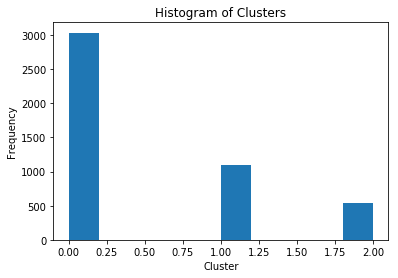

In [13]:
import matplotlib.pyplot as plt
plt.hist(df_norm['clust'])
plt.title('Histogram of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

In [14]:
len(rest)

1544

In [15]:
len(forward)

1612

In [16]:
len(back)

1517